<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/PowerTransFormer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.datasets import  fetch_california_housing
X,y=fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
X=X.iloc[:,:-2]

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


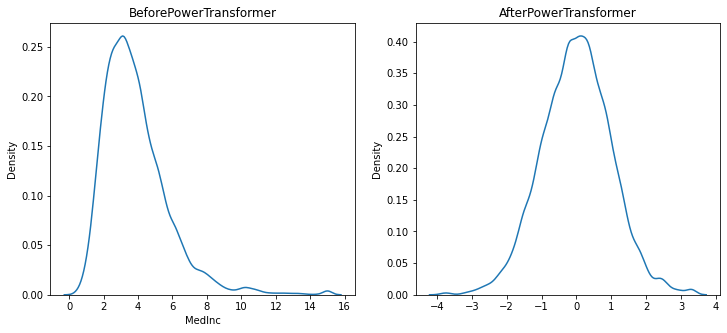

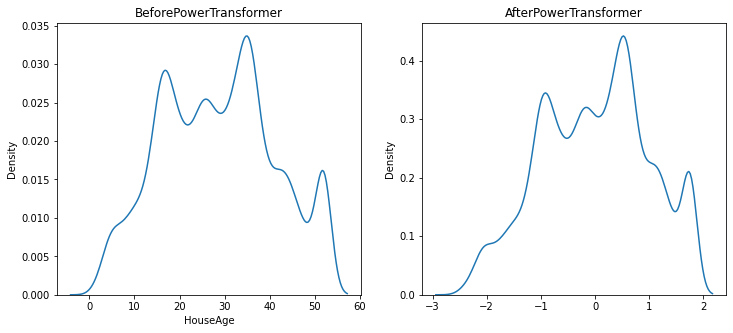

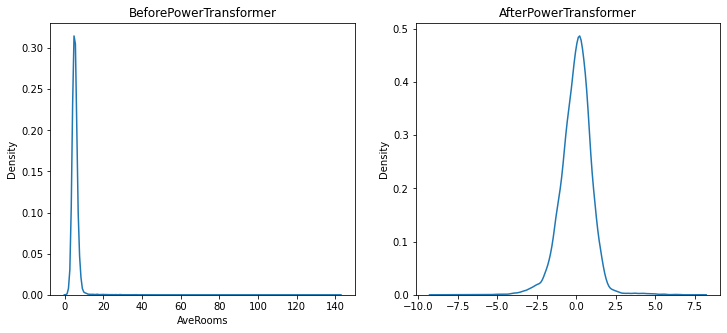

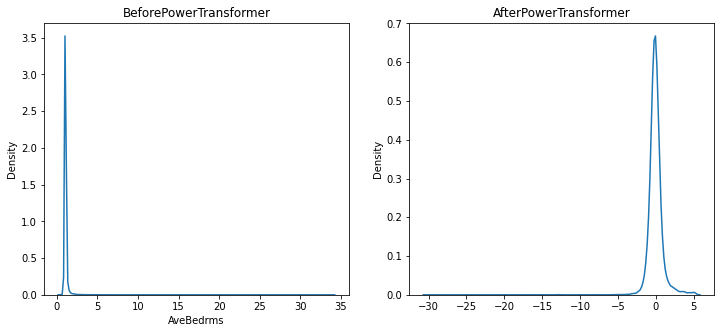

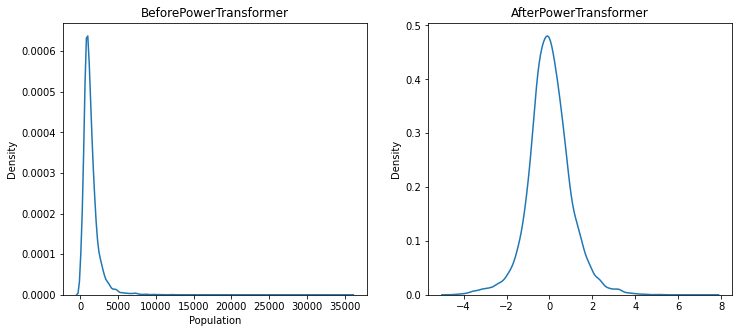

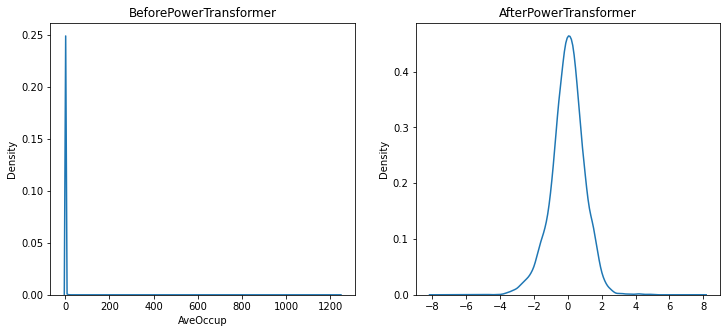

In [ ]:
def plot(df,var,t):
  plt.figure(figsize=(12,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('Before'+str(t).split('(')[0])
  plt.subplot(122)
  p1=t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('After'+str(t).split('(')[0])
for col in X.columns:
  plot(X,col,PowerTransformer(method='box-cox'))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
p=PowerTransformer(method='box-cox')
p.fit_transform(X_train)

array([[ 0.40281908, -1.92782549,  1.42598869,  0.82522832, -1.96446909,
         0.84580969],
       [ 0.47870349,  1.75743614,  0.12767532,  0.34757828,  0.32304211,
         0.65346554],
       [ 0.24184739, -0.16025422, -0.36702734, -0.09053295, -0.21606302,
        -0.01882737],
       ...,
       [-0.19787028,  0.22945234, -1.35085249, -1.12159002, -0.70907513,
        -1.94051908],
       [ 1.02558383,  0.45750336, -0.47358212,  0.05988359, -0.17597578,
        -0.89334188],
       [-1.88200113, -1.07487729, -1.04180675,  0.34757828, -0.21336265,
         0.77358437]])

In [ ]:
p.lambdas_

array([ 0.09829722,  0.81124522, -0.28269234, -1.58333516,  0.23291759,
       -0.49773796])

In [ ]:
def model_accuracy_scaled(mod):
  model_scaled=Pipeline([
      ('scale',PowerTransformer(method='box-cox'))
      ('model',mod)
  ])
  model_scale.fit(X_train,y_train)
  return model_scale.score(X_test,y_test)

In [ ]:
def model_accuracy_scaled(mod):
  model_unscaled=Pipeline([
      ('scale',PowerTransformer(method='box-cox'))
      ('model',mod)
  ])
  model_scale.fit(X_train,y_train)
  return model_scale.score(X_test,y_test)

In [ ]:
model_accuracy_scaled(KNeighborsRegressor())

TypeError: ignored

In [ ]:
model_accuracy_unscaled(KNeighborsRegressor())

In [ ]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

In [ ]:

model_accuracy_unscaled(RandomForestRgressor(random_state=0))

TypeError: ignored